In [1]:
# **Objective 1: Data Acquisition and Intelligent Preprocessing**

# **Dataset Acquisition:** Download the "Diabetes Health Indicators Dataset" from Kaggle.
# Access to Relevant Datasets: "Diabetes Health Indicators Dataset" from Kaggle:
# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

# **Import necessary libraries**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler 

pd.set_option('display.max_columns', None) 

# Data Loading
print("Loading the Diabetes Health Indicators Dataset...")
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print("Dataset loaded successfully!")

# **Data Inspection:** Conduct initial data inspection to understand data structure, variable types, and identify potential data quality issues.
print("\nInitial Data Inspection:")
display(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe().T)

Loading the Diabetes Health Indicators Dataset...
Dataset loaded successfully!

Initial Data Inspection:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 n

In [2]:
# **Data Cleaning:** Address missing values, identify and manage outliers, normalize features.
print("\nData Cleaning and Preprocessing:")

# Check for missing values
print("\nMissing values before handling:")
print(data.isnull().sum())
# No missing values detected in this dataset, as indicated in the project proposal and dataset description.

# Identify and handle outliers for all numerical features using IQR and KNN Imputation
numerical_features_for_outlier_handling = ['BMI', 'Age', 'Income', 'MentHlth', 'PhysHlth'] # List of numerical features to handle outliers

print("\nHandling outliers for numerical features using IQR and KNN Imputation:")
imputer = KNNImputer(n_neighbors=5) # Initialize KNNImputer - you can tune n_neighbors

for feature in numerical_features_for_outlier_handling:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outlier identification
    outlier_indices = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
    print(f"\nNumber of {feature} outliers (using IQR): {len(outlier_indices)}")

    # KNN Imputation of outliers
    if not outlier_indices.empty: # Only impute if outliers exist
        imputed_values = imputer.fit_transform(data[[feature]]) # Fit imputer on the feature column
        data.loc[outlier_indices, feature] = imputed_values[outlier_indices, 0] # Impute outliers with KNN-imputed values
        print(f"{feature} outliers imputed using KNN.")
    else:
        print(f"No outliers found for {feature}, skipping imputation.")


Data Cleaning and Preprocessing:

Missing values before handling:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Handling outliers for numerical features using IQR and KNN Imputation:

Number of BMI outliers (using IQR): 9847
BMI outliers imputed using KNN.

Number of Age outliers (using IQR): 0
No outliers found for Age, skipping imputation.

Number of Income outliers (using IQR): 0
No outliers found for Income, skipping imputation.

Number of MentHlth ou

In [3]:
# # **Feature Normalization/Scaling:** Apply appropriate normalization or scaling techniques
# RobustScaler 
scaler_robust = RobustScaler()
numerical_features = ['BMI', 'Age', 'Income', 'MentHlth', 'PhysHlth']
data[numerical_features] = scaler_robust.fit_transform(data[numerical_features])
print("\nNumerical features normalized/scaled using RobustScaler.")

# **Data Splitting:** Split the preprocessed data into training, validation, and testing sets
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # Initial split for train and temp (validation+test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split temp into validation and test

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

print("\n**Objective 1: Data Acquisition and Intelligent Preprocessing - COMPLETED**")



Numerical features normalized/scaled using RobustScaler.

Training set shape: (177576, 21)
Validation set shape: (38052, 21)
Test set shape: (38052, 21)

**Objective 1: Data Acquisition and Intelligent Preprocessing - COMPLETED**



**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**

Univariate Analysis - Distribution of Features:


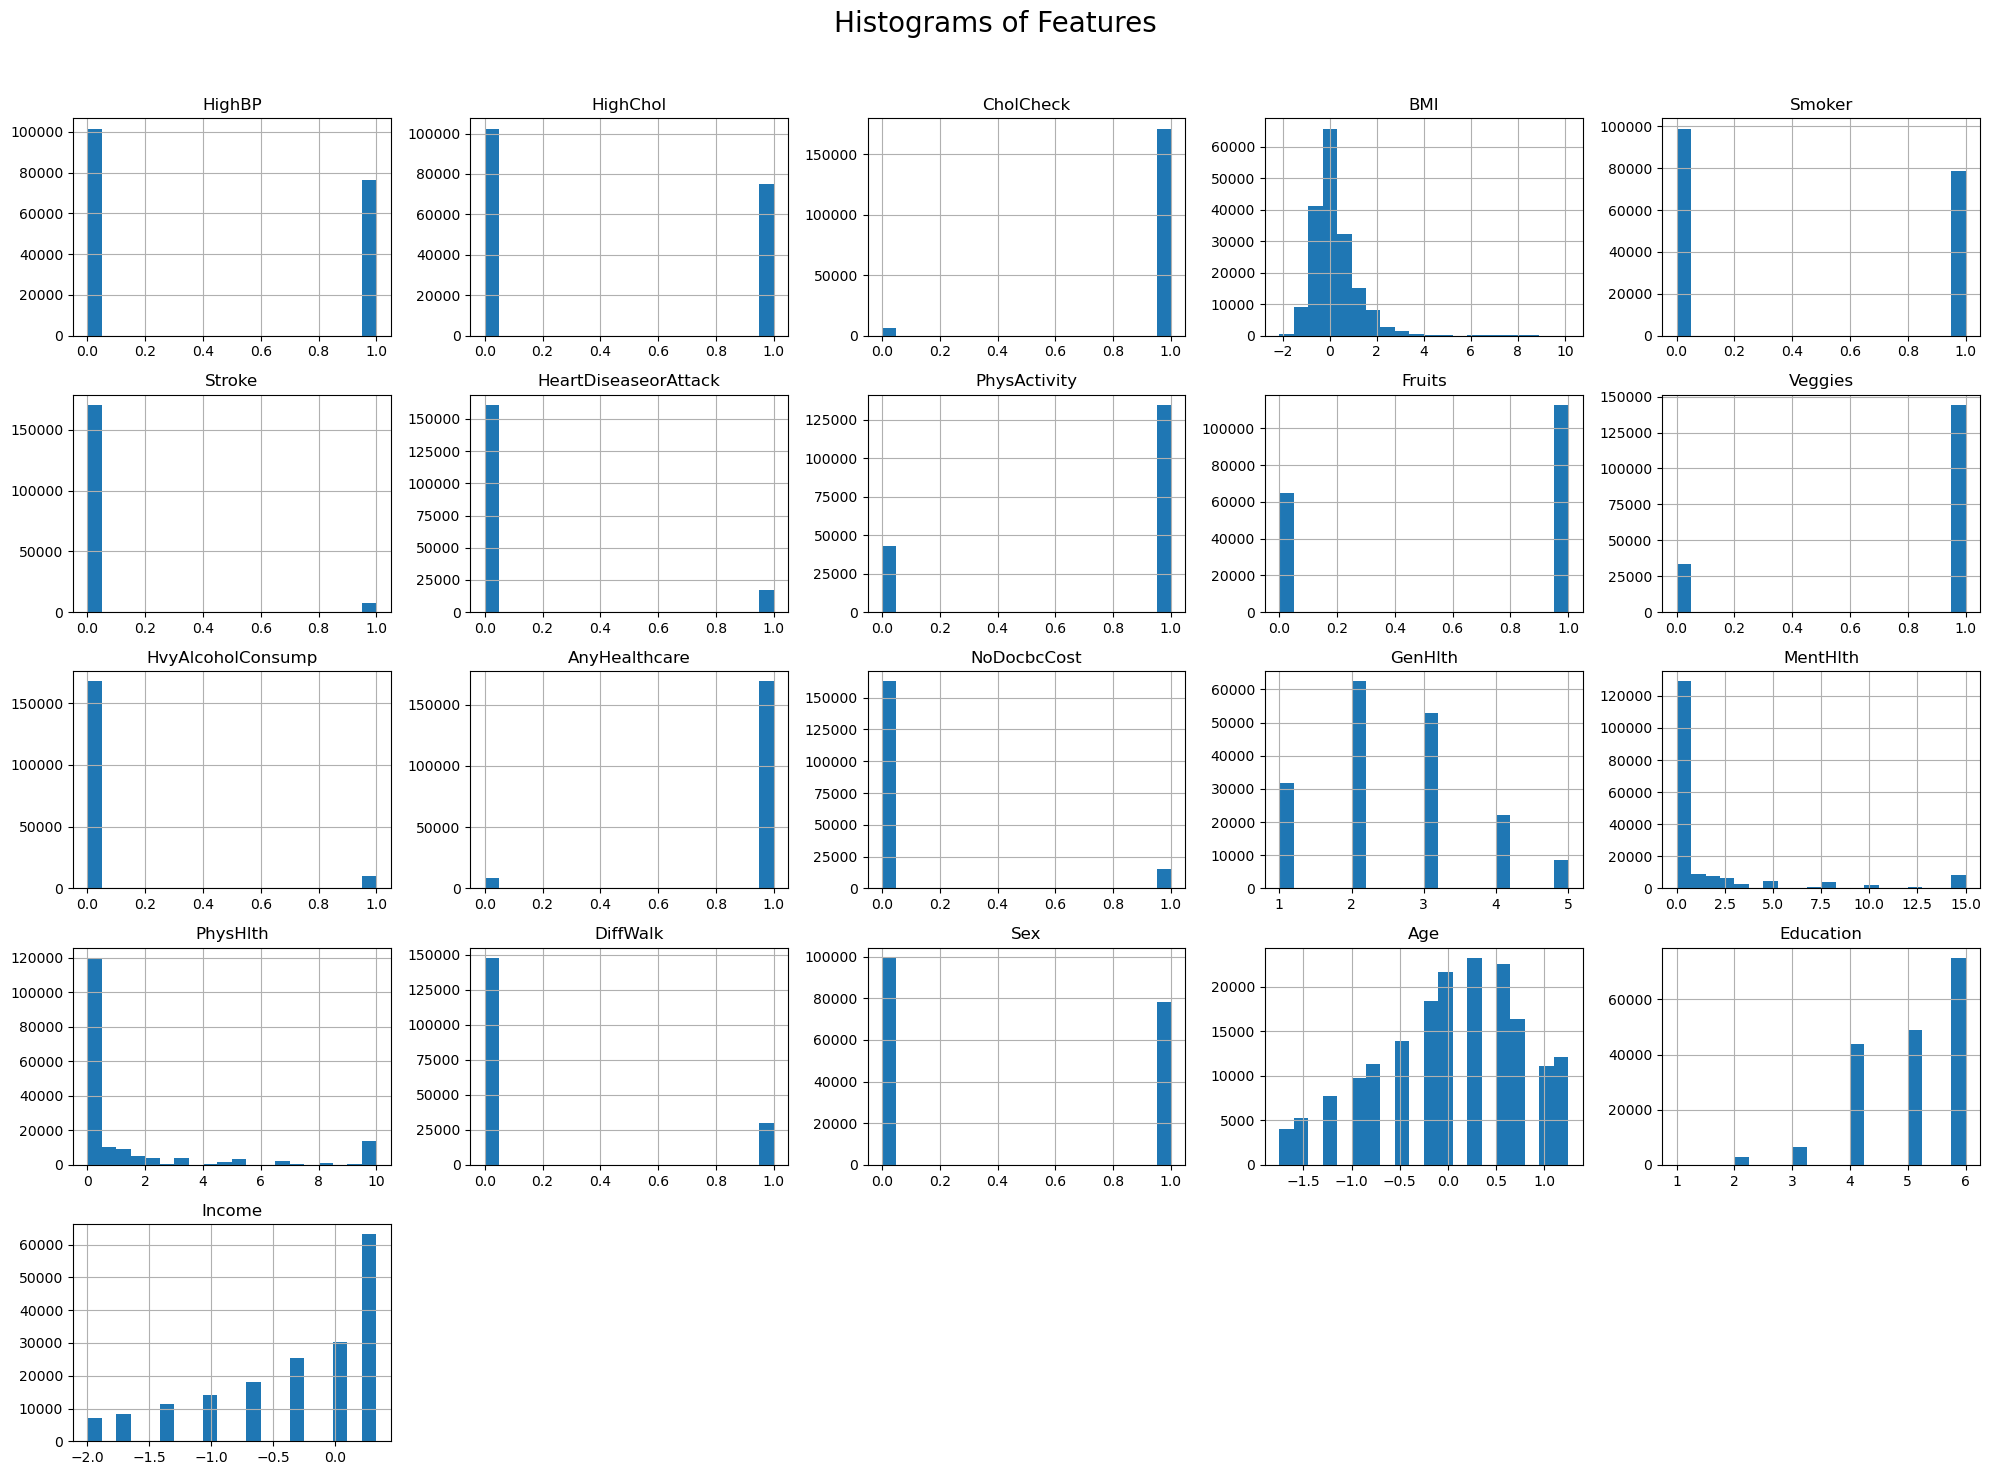

In [4]:
# **Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**

print("\n**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**")

# **Univariate Analysis:** Analyze the distribution of individual features
print("\nUnivariate Analysis - Distribution of Features:")
X_train.hist(figsize=(20,15), bins=20)
plt.suptitle('Histograms of Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to fit title
plt.show()



Bivariate Analysis - Correlation Matrix:


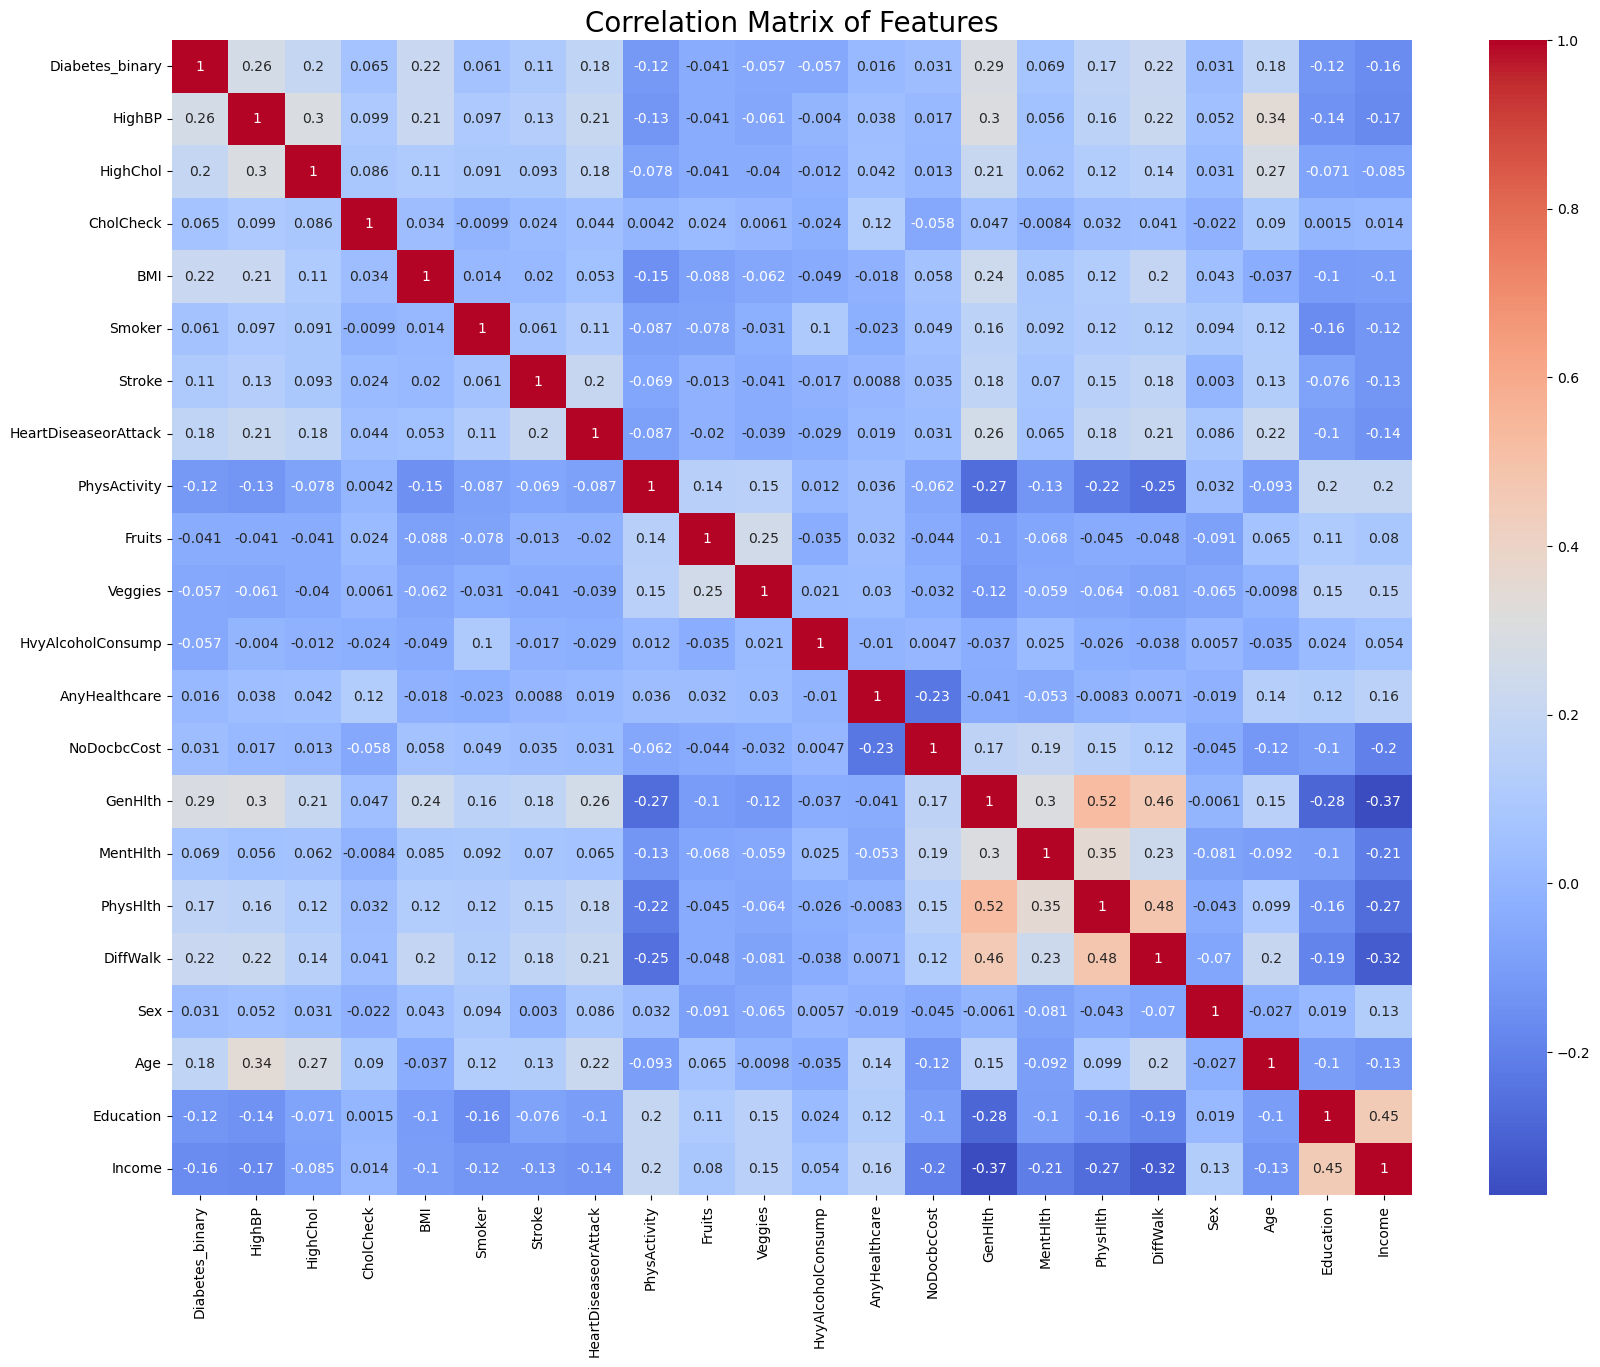

In [5]:
# **Bivariate and Multivariate Analysis:** Explore relationships between features and the target variable
print("\nBivariate Analysis - Correlation Matrix:")
correlation_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()


Bivariate Analysis - Enhanced Pair Plots (Optimal Combination - KDE Off-Diagonal, Histograms Diagonal):


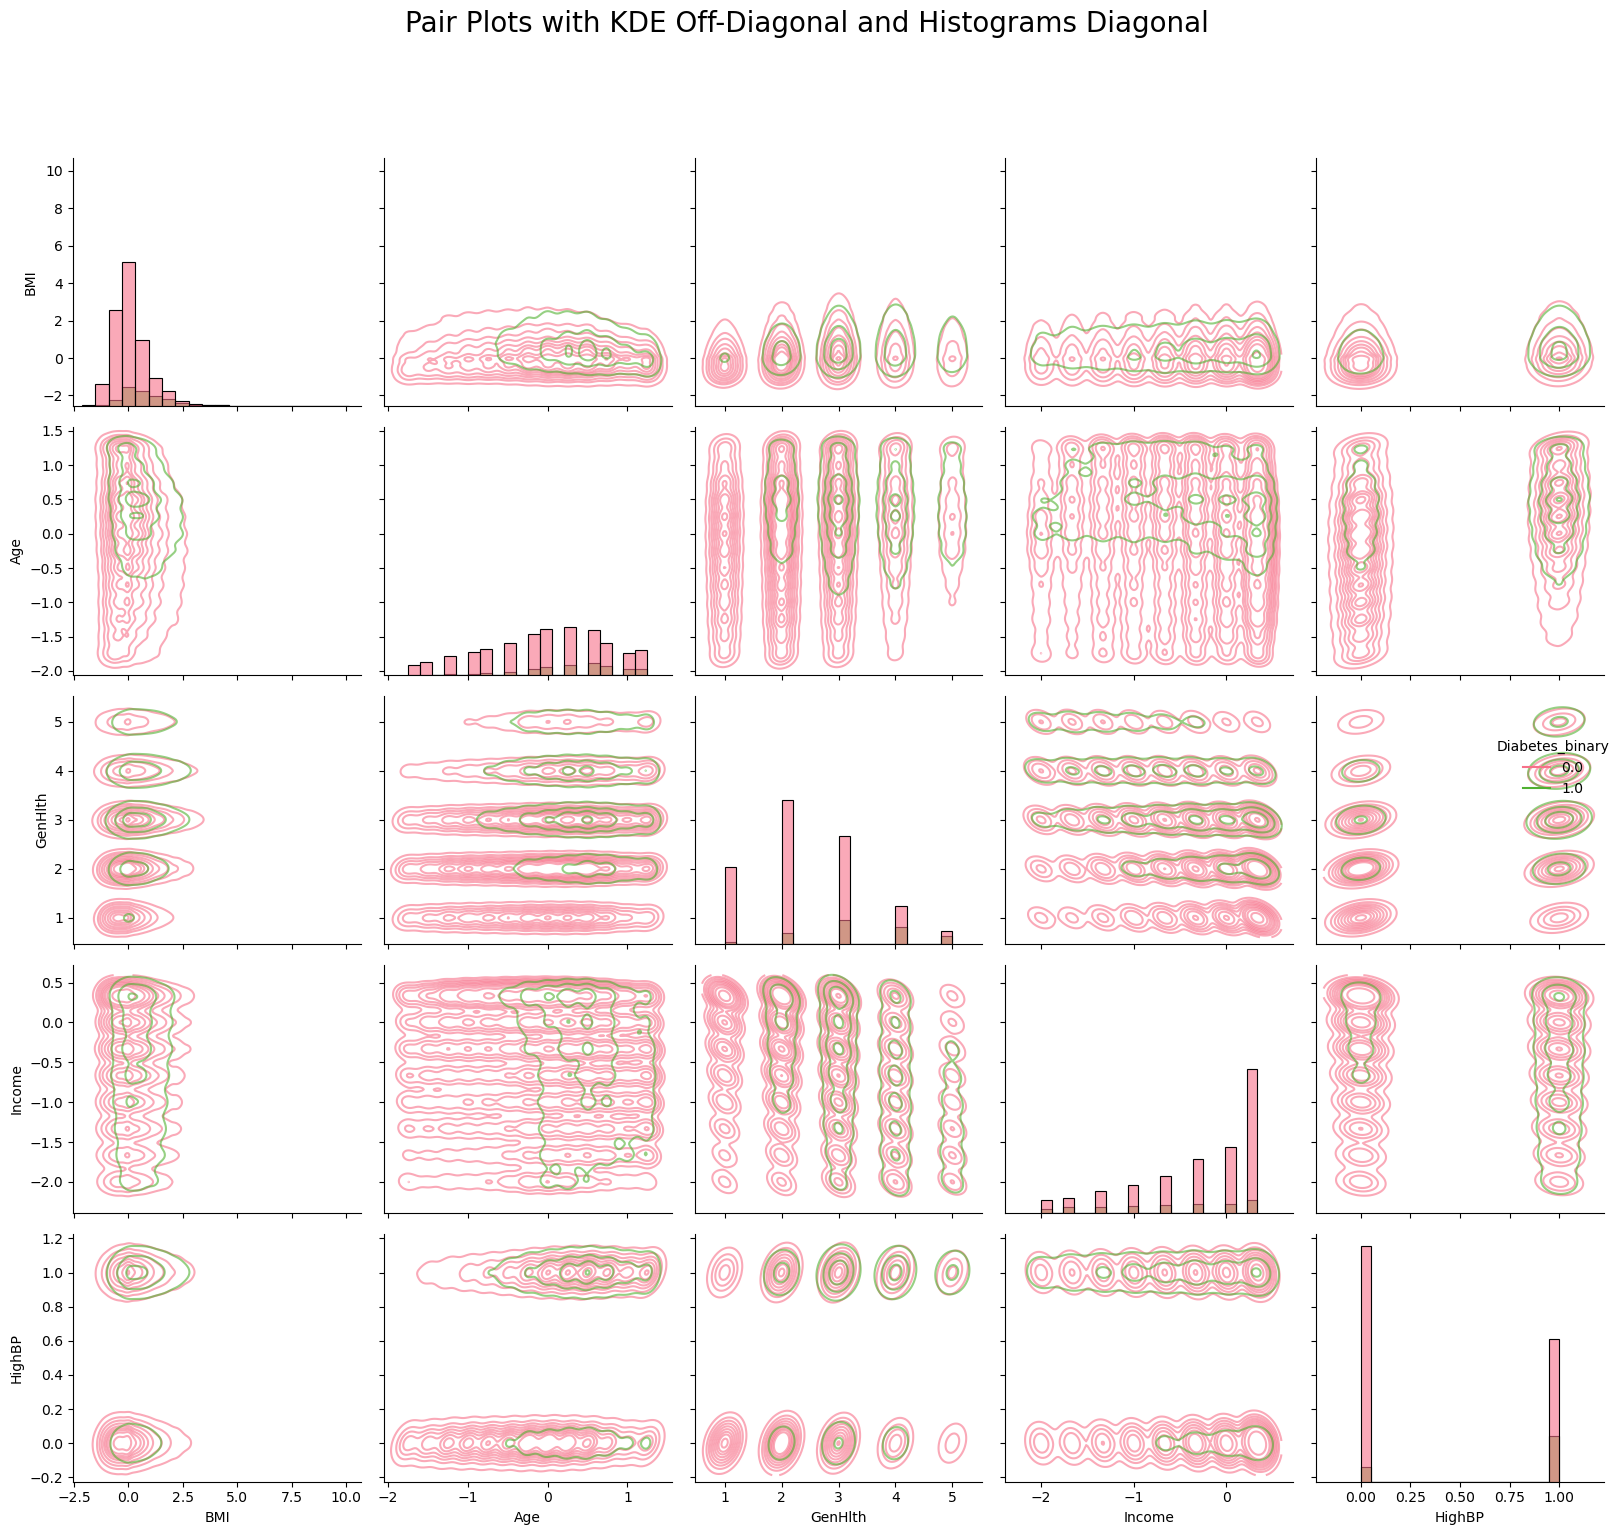

In [6]:
# Pair plots for selected features 
print("\nBivariate Analysis - Enhanced Pair Plots (Optimal Combination - KDE Off-Diagonal, Histograms Diagonal):")

features_for_pairplot = ['Diabetes_binary', 'BMI', 'Age', 'GenHlth', 'Income', 'HighBP']

# Define a visually distinct color palette
palette = sns.color_palette("husl", n_colors=3)[:2] # Use only first 2 colors for binary target

pair_plot_grid_kde_hist = sns.pairplot(
    data[features_for_pairplot],
    hue='Diabetes_binary',
    kind='kde', # Use KDE for off-diagonal plots for bivariate distributions
    diag_kind='hist', # Diagonal as histogram for univariate distributions
    palette=palette,
    plot_kws={'alpha': 0.6}, # Customization for KDE plots (transparency)
    diag_kws={'bins': 20, 'fill': True, 'alpha': 0.6, 'color': [palette[0], palette[1]]}, # Customize histograms
    height=3 # Adjust height for readability
)

pair_plot_grid_kde_hist.fig.suptitle("Pair Plots with KDE Off-Diagonal and Histograms Diagonal", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Univariate Analysis - Boxplots for Key Features:


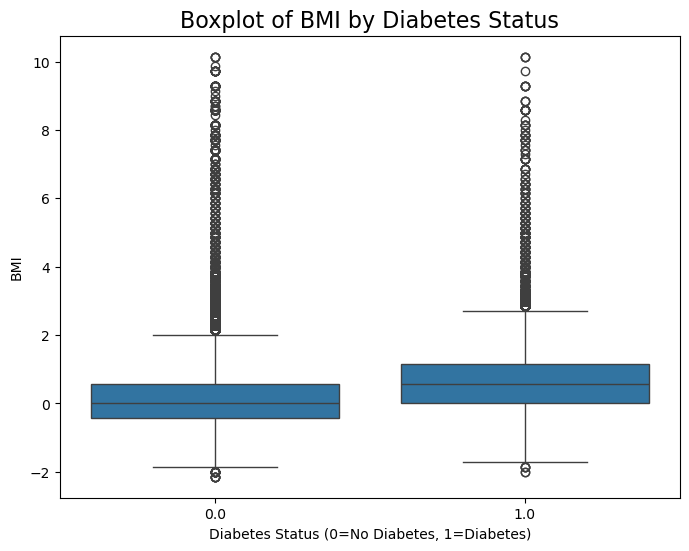

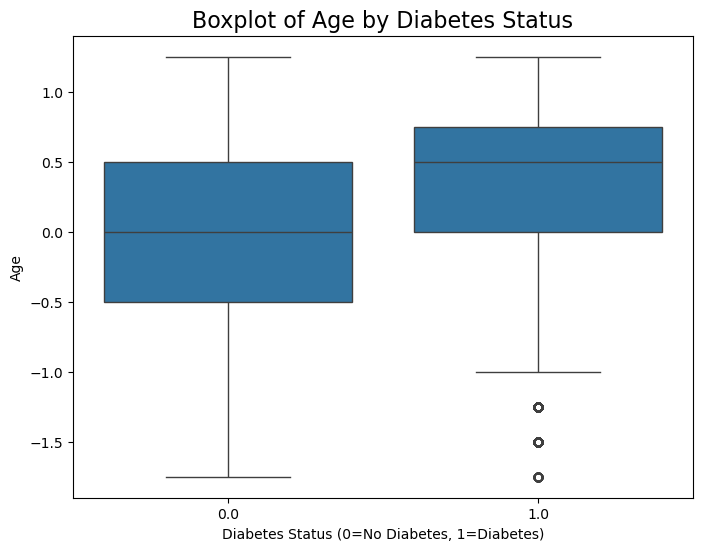

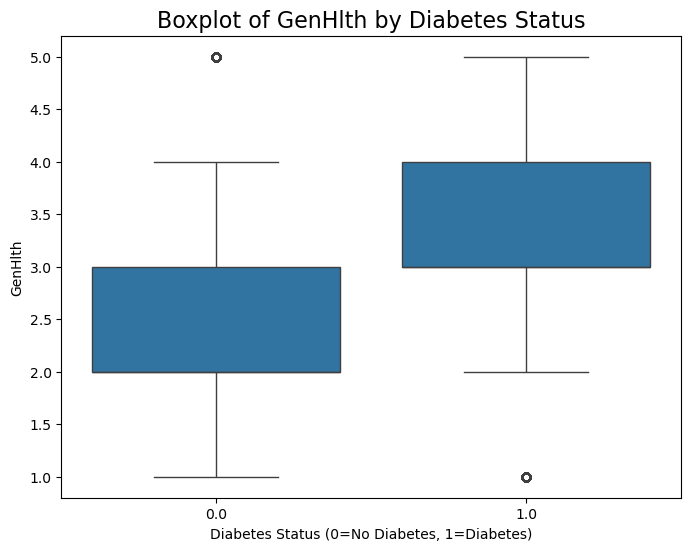

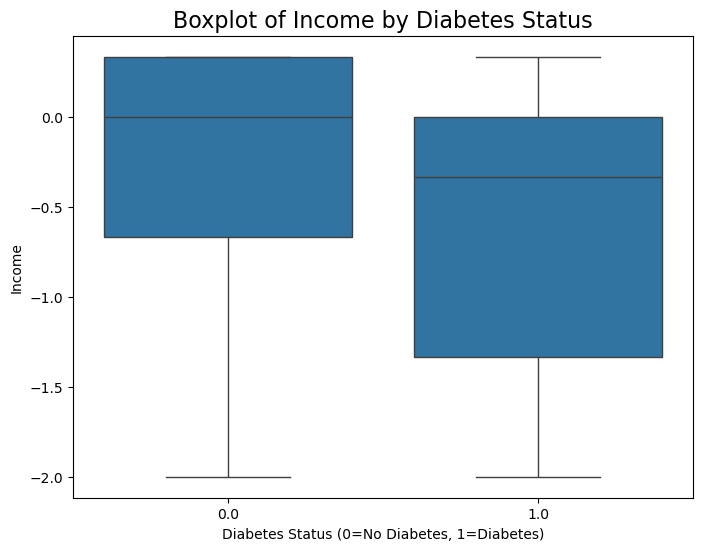

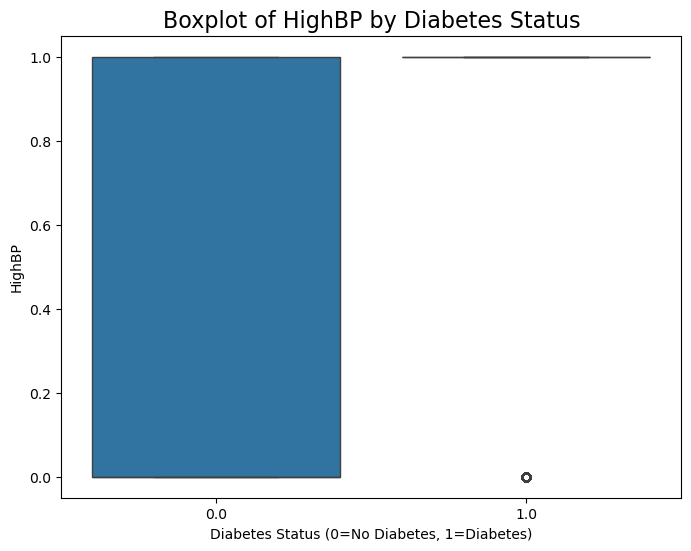


Univariate Analysis - Violin Plots for Key Features:


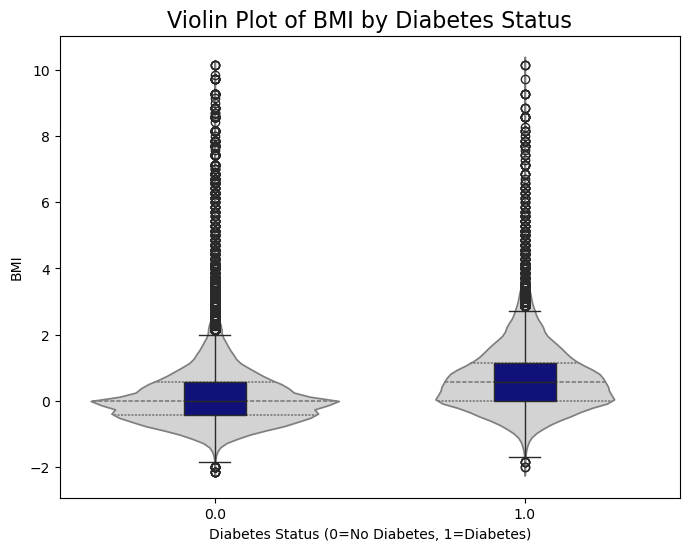

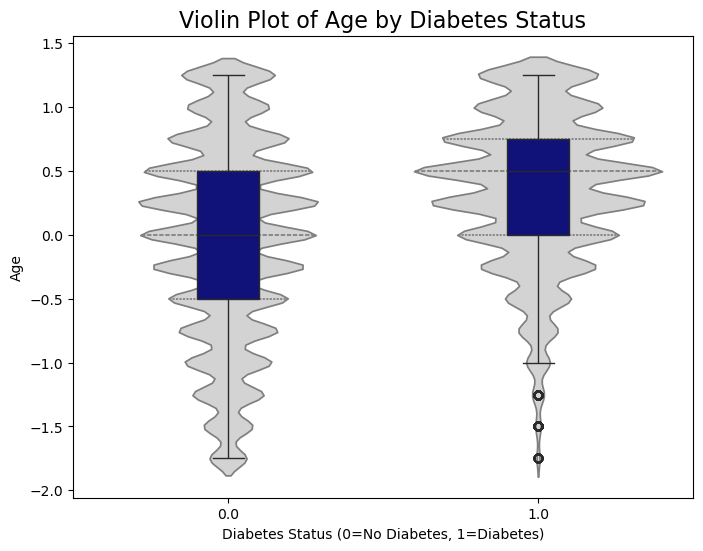

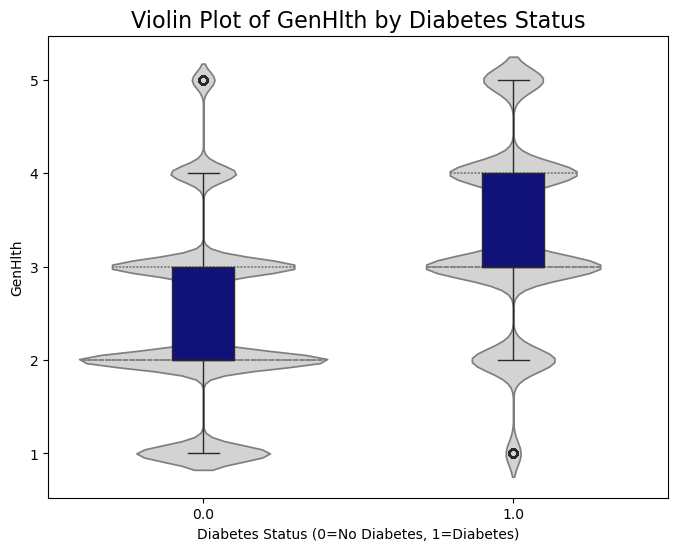

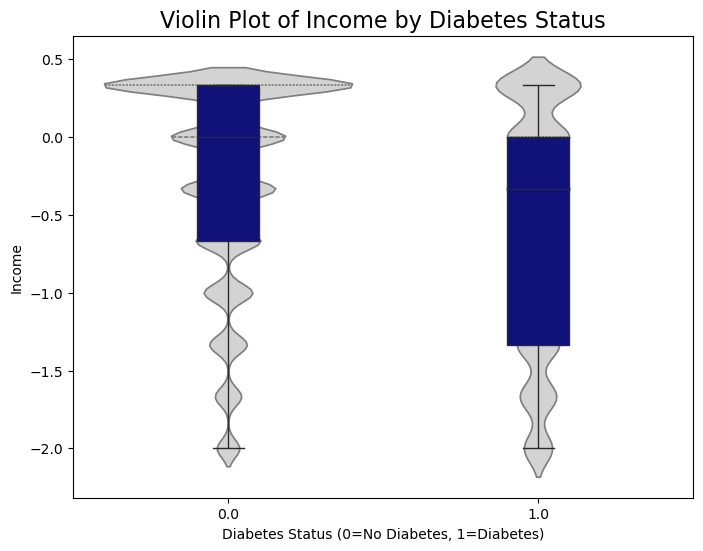

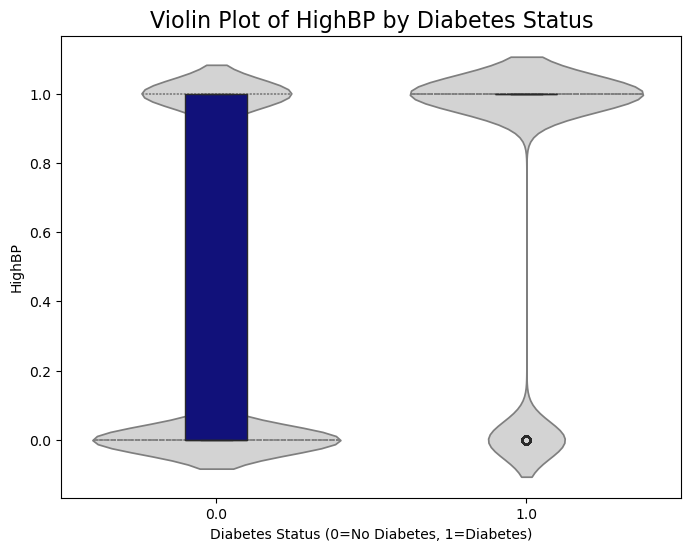

In [7]:
# Univariate Analysis - Boxplots and Violin Plots for Key Features
print("\nUnivariate Analysis - Boxplots for Key Features:")

features_for_boxplots_violin = ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP'] # Key features list (excluding target)

for feature in features_for_boxplots_violin:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Diabetes Status', fontsize=16)
    plt.xlabel('Diabetes Status (0=No Diabetes, 1=Diabetes)')
    plt.ylabel(feature)
    plt.show()

print("\nUnivariate Analysis - Violin Plots for Key Features:")

for feature in features_for_boxplots_violin:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Diabetes_binary', y=feature, data=data, inner="quart", color="lightgray") # Added inner="quart" and color for better visualization
    sns.boxplot(x='Diabetes_binary', y=feature, data=data, width=0.2, color="darkblue") # Overlay boxplot for median and IQR
    plt.title(f'Violin Plot of {feature} by Diabetes Status', fontsize=16)
    plt.xlabel('Diabetes Status (0=No Diabetes, 1=Diabetes)')
    plt.ylabel(feature)
    plt.show()


In [8]:
# **Feature Engineering:** Explore feature engineering techniques to create new, potentially more informative features.
print("\nFeature Engineering - Creating Interaction and Categorical Features based on EDA Insights:")

# 1. BMI Categories Feature:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

X_train['BMI_Category'] = X_train['BMI'].apply(bmi_category)
X_val['BMI_Category'] = X_val['BMI'].apply(bmi_category)
X_test['BMI_Category'] = X_test['BMI'].apply(bmi_category)
print("Engineered 'BMI_Category' feature.")


# 2. BMI-Age Interaction Feature:
X_train['BMI_Age_Interaction'] = X_train['BMI'] * X_train['Age']
X_val['BMI_Age_Interaction'] = X_val['BMI'] * X_val['Age']
X_test['BMI_Age_Interaction'] = X_test['BMI'] * X_test['Age']
print("Engineered 'BMI_Age_Interaction' feature.")

# 3. GenHlth-HighBP Interaction Feature:
X_train['Health_Risk_Index'] = X_train['GenHlth'] * X_train['HighBP']
X_val['Health_Risk_Index'] = X_val['GenHlth'] * X_val['HighBP']
X_test['Health_Risk_Index'] = X_test['GenHlth'] * X_test['HighBP']
print("Engineered 'Health_Risk_Index' feature.")


# One-Hot Encode Categorical Feature: BMI_Category
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array output
encoder.fit(X_train[['BMI_Category']]) # Fit encoder on training data categories

# Transform train, validation, and test sets
bmi_cat_train_encoded = encoder.transform(X_train[['BMI_Category']])
bmi_cat_val_encoded = encoder.transform(X_val[['BMI_Category']])
bmi_cat_test_encoded = encoder.transform(X_test[['BMI_Category']])

# Create DataFrames from encoded arrays and set column names
bmi_cat_train_df = pd.DataFrame(bmi_cat_train_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_train.index)
bmi_cat_val_df = pd.DataFrame(bmi_cat_val_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_val.index)
bmi_cat_test_df = pd.DataFrame(bmi_cat_test_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_test.index)

# Concatenate encoded features with original DataFrames (dropping original BMI_Category column)
X_train = pd.concat([X_train.drop('BMI_Category', axis=1), bmi_cat_train_df], axis=1)
X_val = pd.concat([X_val.drop('BMI_Category', axis=1), bmi_cat_val_df], axis=1)
X_test = pd.concat([X_test.drop('BMI_Category', axis=1), bmi_cat_test_df], axis=1)

print("One-hot encoded 'BMI_Category' feature and concatenated to DataFrames.")


print("\n**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering - COMPLETED**")


Feature Engineering - Creating Interaction and Categorical Features based on EDA Insights:
Engineered 'BMI_Category' feature.
Engineered 'BMI_Age_Interaction' feature.
Engineered 'Health_Risk_Index' feature.
One-hot encoded 'BMI_Category' feature and concatenated to DataFrames.

**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering - COMPLETED**


In [9]:
# --- Feature Selection/Reduction based on Correlation (Illustrative Example - User can customize) ---
print("\nFeature Selection/Reduction - Correlation-based (Illustrative Example):")

correlation_threshold = 0.8 # Example threshold - adjust as needed

# Calculate correlation matrix (already calculated earlier as correlation_matrix)
# Use the correlation matrix calculated earlier: correlation_matrix = data.corr()

# Identify highly correlated features (absolute value of correlation > threshold)
upper_triangle_corr_matrix = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.corr().shape), k=1).astype(bool)) # Select upper triangle for redundancy removal
highly_corr_features = [column for column in upper_triangle_corr_matrix.columns if any(upper_triangle_corr_matrix[column] > correlation_threshold)]

print(f"\nFeatures identified for potential removal based on correlation > {correlation_threshold}: {highly_corr_features}")

# Example: Reduce features by dropping highly correlated ones (Illustrative - User can customize)
X_reduced_corr = X_train.drop(highly_corr_features, axis=1, errors='ignore') # errors='ignore' in case some features are already dropped
print(f"Shape of X_train before correlation-based reduction: {X_train.shape}")
print(f"Shape of X_reduced_corr after correlation-based reduction: {X_reduced_corr.shape}")


# --- Calculate VIF for the remaining features AFTER correlation-based reduction ---
print("\n--- Calculating VIF for remaining features ---")
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import VIF function here

vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced_corr.columns # Use X_reduced_corr columns

# Impute infinite values with a large number (e.g., 1e10) before calculating VIF
X_reduced_corr_fillna = X_reduced_corr.replace([np.inf, -np.inf], 1e10)

# Handle potential NaN values in X_reduced_corr_fillna (impute with mean for VIF calculation)
X_reduced_corr_fillna = X_reduced_corr_fillna.fillna(X_reduced_corr_fillna.mean(numeric_only=True))

vif_data["VIF"] = [variance_inflation_factor(X_reduced_corr_fillna.values, i)
                   for i in range(X_reduced_corr_fillna.shape[1])]  # Use X_reduced_corr_fillna

print(vif_data.sort_values(by=['VIF'], ascending=False))
print("\n--- VIF Interpretation ---")
print("VIF values > 5 or 10 are often considered indicative of high multicollinearity.")
print("Consider further feature reduction or using regularization techniques if multicollinearity is still a concern.")


Feature Selection/Reduction - Correlation-based (Illustrative Example):

Features identified for potential removal based on correlation > 0.8: []
Shape of X_train before correlation-based reduction: (177576, 24)
Shape of X_reduced_corr after correlation-based reduction: (177576, 24)

--- Calculating VIF for remaining features ---
                     feature         VIF
23  BMI_Category_Underweight  100.773872
22         Health_Risk_Index   10.109524
0                     HighBP    7.926670
13                   GenHlth    2.573591
15                  PhysHlth    1.633104
16                  DiffWalk    1.558273
20                    Income    1.503468
18                       Age    1.356778
19                 Education    1.324851
14                  MentHlth    1.236949
6       HeartDiseaseorAttack    1.181825
3                        BMI    1.176287
1                   HighChol    1.172696
7               PhysActivity    1.156974
12               NoDocbcCost    1.144489
11         

In [10]:
# --- Address Multicollinearity - Remove BMI_Category_Underweight ---
X_reduced_corr = X_reduced_corr.drop('BMI_Category_Underweight', axis=1, errors='ignore')
X_val = X_val.drop('BMI_Category_Underweight', axis=1, errors='ignore') # Apply to validation set as well
X_test = X_test.drop('BMI_Category_Underweight', axis=1, errors='ignore') # Apply to test set as well
print("\nRemoved 'BMI_Category_Underweight' feature to reduce multicollinearity.")
print(f"Shape of X_reduced_corr after removing BMI_Category_Underweight: {X_reduced_corr.shape}")


# --- Re-calculate VIF for the remaining features AFTER removing BMI_Category_Underweight ---
print("\n--- Re-calculating VIF for remaining features ---")
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import VIF function here

vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced_corr.columns # Use X_reduced_corr columns

# Impute infinite values with a large number (e.g., 1e10) before calculating VIF
X_reduced_corr_fillna = X_reduced_corr.replace([np.inf, -np.inf], 1e10)

# Handle potential NaN values in X_reduced_corr_fillna (impute with mean for VIF calculation)
X_reduced_corr_fillna = X_reduced_corr_fillna.fillna(X_reduced_corr_fillna.mean(numeric_only=True))

vif_data["VIF"] = [variance_inflation_factor(X_reduced_corr_fillna.values, i)
                   for i in range(X_reduced_corr_fillna.shape[1])]  # Use X_reduced_corr_fillna

print(vif_data.sort_values(by=['VIF'], ascending=False))
print("\n--- VIF Interpretation (after removing BMI_Category_Underweight) ---")
print("VIF values > 5 or 10 are often considered indicative of high multicollinearity.")
print("Consider further feature reduction or using regularization techniques if multicollinearity is still a concern.")


# --- Note for Model Training (Objective 3 & 4) ---
print("\n--- IMPORTANT NOTE FOR MODEL TRAINING (Objective 3 & 4) ---")
print("Remember to use regularization (L1 or L2) in Logistic Regression and Neural Network models")
print("to mitigate potential multicollinearity from Health_Risk_Index and HighBP.")
print("Tree-based models (Random Forest, Gradient Boosting) are less sensitive to multicollinearity.")


Removed 'BMI_Category_Underweight' feature to reduce multicollinearity.
Shape of X_reduced_corr after removing BMI_Category_Underweight: (177576, 23)

--- Re-calculating VIF for remaining features ---
                 feature        VIF
19             Education  23.836019
2              CholCheck  21.923408
11         AnyHealthcare  19.237762
22     Health_Risk_Index  15.702729
13               GenHlth  14.582949
0                 HighBP  13.458417
9                Veggies   5.774040
7           PhysActivity   4.682411
8                 Fruits   3.028006
1               HighChol   2.033238
15              PhysHlth   2.008133
4                 Smoker   1.934955
17                   Sex   1.888787
16              DiffWalk   1.873403
20                Income   1.656736
14              MentHlth   1.465333
18                   Age   1.340743
6   HeartDiseaseorAttack   1.303959
12           NoDocbcCost   1.238227
3                    BMI   1.227175
5                 Stroke   1.129334
10    

In [11]:
def iterative_vif_reduction(X_df, vif_threshold=10.0):
    """
    Iteratively removes features with the highest VIF until all features have VIF below the threshold.

    Args:
        X_df (pd.DataFrame): DataFrame containing features.
        vif_threshold (float): VIF threshold above which features are removed.

    Returns:
        pd.DataFrame: DataFrame with reduced features (multicollinearity reduced).
        list: List of features removed during the process.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor # Import VIF function

    reduced_X_df = X_df.copy() # Create a copy to avoid modifying original DataFrame
    features_removed = []

    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = reduced_X_df.columns
        
        # Impute infinite values and NaN values for VIF calculation
        X_fillna = reduced_X_df.replace([np.inf, -np.inf], 1e10).fillna(reduced_X_df.mean(numeric_only=True))
        vif_data["VIF"] = [variance_inflation_factor(X_fillna.values, i) 
                           for i in range(X_fillna.shape[1])]

        max_vif = vif_data['VIF'].max()
        if max_vif <= vif_threshold:
            break # Stop iteration if no feature exceeds VIF threshold

        feature_to_remove = vif_data.sort_values(by=['VIF'], ascending=False).iloc[0]['feature'] # Feature with highest VIF
        reduced_X_df = reduced_X_df.drop(feature_to_remove, axis=1, errors='ignore')
        features_removed.append(feature_to_remove)
        print(f"Removed feature: {feature_to_remove}, Max VIF: {max_vif:.2f}") # Print removed feature and max VIF

    print("\n--- Iterative VIF Reduction Complete ---")
    print("Remaining features (multicollinearity reduced):")
    print(reduced_X_df.columns.tolist())
    print("\nFeatures removed during VIF reduction:")
    print(features_removed)
    
    vif_data_final = pd.DataFrame()  # Calculate and print final VIFs for remaining features
    vif_data_final["feature"] = reduced_X_df.columns
    X_fillna_final = reduced_X_df.replace([np.inf, -np.inf], 1e10).fillna(reduced_X_df.mean(numeric_only=True))
    vif_data_final["VIF"] = [variance_inflation_factor(X_fillna_final.values, i) 
                           for i in range(X_fillna_final.shape[1])]
    print("\nFinal VIF values for remaining features:")
    print(vif_data_final.sort_values(by=['VIF'], ascending=False))


    return reduced_X_df, features_removed

# Apply iterative VIF reduction (using X_reduced_corr from previous step as starting point)
X_reduced_vif, removed_features_vif = iterative_vif_reduction(X_reduced_corr, vif_threshold=10.0) # You can adjust vif_threshold

# Apply the same reduction to validation and test sets for consistency
X_val_reduced_vif = X_val[X_reduced_vif.columns]
X_test_reduced_vif = X_test[X_reduced_vif.columns]


# Print shapes to confirm reduction
print(f"\nShape of X_reduced_corr before Iterative VIF Reduction: {X_reduced_corr.shape}")
print(f"Shape of X_reduced_vif after Iterative VIF Reduction: {X_reduced_vif.shape}")

Removed feature: Education, Max VIF: 23.84
Removed feature: CholCheck, Max VIF: 19.13
Removed feature: Health_Risk_Index, Max VIF: 14.92
Removed feature: AnyHealthcare, Max VIF: 10.73

--- Iterative VIF Reduction Complete ---
Remaining features (multicollinearity reduced):
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'BMI_Age_Interaction']

Features removed during VIF reduction:
['Education', 'CholCheck', 'Health_Risk_Index', 'AnyHealthcare']

Final VIF values for remaining features:
                 feature       VIF
11               GenHlth  7.625138
8                Veggies  4.831441
6           PhysActivity  3.821185
7                 Fruits  2.890759
0                 HighBP  2.313780
1               HighChol  2.005177
13              PhysHlth  1.969501
3                 Smoker  1.909258
14              DiffWal

In [12]:
# Objective 3: Development and Training of Diverse Machine Learning Models
print("\n**Objective 3: Development and Training of Diverse Machine Learning")
print("Models (using VIF-reduced data) - THOROUGH GridSearchCV &")
print("Expanded LR Tuning, Efficient RF Tuning**")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', penalty='l2'),  # Added regularization for LR
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=300, early_stopping=True, hidden_layer_sizes=(100,), alpha=0.0001)  # Simple NN for demonstration
}
trained_models = {}

# Use X_reduced_vif, X_val_reduced_vif, X_test_reduced_vif for training and validation/testing
X_train_vif = X_reduced_vif  # Assign VIF-reduced training data - use X_reduced_vif
X_val_vif = X_val_reduced_vif
X_test_vif = X_test_reduced_vif


# --- Thorough Optimization for Logistic Regression using GridSearchCV - EXPANDED GRID ---
print("\n--- Thoroughly Optimizing Logistic Regression Model using GridSearchCV - EXPANDED GRID ---")
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV (already imported, but included for clarity)

param_grid_lr = {  # Define EXPANDED hyperparameter grid for Logistic Regression - EVEN MORE THOROUGH
    'C': np.logspace(-6, 6, 50),  # Even wider and finer C range (50 values)
    'penalty': ['l1', 'l2'],  # Explore both L1 and L2 penalties
    'solver': ['liblinear', 'saga']  # ADDED: Explore both 'liblinear' and 'saga' solvers - for L2 penalty, 'saga' can be more efficient
}
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),  # Base Logistic Regression model (solver will be set by param_grid)
    param_grid=param_grid_lr,   # Expanded hyperparameter grid
    scoring='f1_weighted',      # Metric to optimize (weighted F1-score)
    cv=10,                      # Increased cross-validation folds to 10 (more robust evaluation)
    verbose=2,                  # Verbosity level
    n_jobs=-1                   # Parallel processing
)
grid_search_lr.fit(X_train_vif, y_train)  # Fit GridSearchCV on VIF-reduced training data

best_lr_model = grid_search_lr.best_estimator_  # Get the best Logistic Regression model from GridSearchCV
best_lr_params = grid_search_lr.best_params_    # Get the best hyperparameters found by GridSearchCV
best_lr_score = grid_search_lr.best_score_      # Get the best validation score (mean cross-validated F1-score)

print("\n--- GridSearchCV Results for Logistic Regression (Thorough Search - Expanded Grid) ---")
print(f"Best Parameters (Logistic Regression): {best_lr_params}")
print(f"Best Validation F1-Score (Logistic Regression): {best_lr_score:.4f}")

# Update trained_models dictionary with the tuned Logistic Regression model
trained_models['Logistic Regression'] = best_lr_model  # Replace default LR with tuned LR



# --- Efficient Optimization for Random Forest using RandomizedSearchCV ---
print("\n--- Efficiently Optimizing Random Forest Model using RandomizedSearchCV ---")
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],  # Fewer, strategically chosen values
    'max_depth': [None, 10, 20, 30],            # Include None and a few specific depths
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],                 # Include both options
    'max_features': ['sqrt', 'log2', None]      # Include sqrt, log2, and None.
}

# Use RandomizedSearchCV for efficient search.  Crucially: n_iter controls the number of combinations tried.
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    scoring='f1_weighted',
    cv=5,  # Fewer CV folds for Random Forest (it's more robust)
    verbose=2,
    n_jobs=-1,
    n_iter=20,  #  Try 20 parameter combinations.  This is KEY for efficiency.
    random_state=42 # Added random_state for reproducibility
)
random_search_rf.fit(X_train_vif, y_train)

best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_
best_rf_score = random_search_rf.best_score_

print("\n--- RandomizedSearchCV Results for Random Forest (Efficient Search) ---")
print(f"Best Parameters (Random Forest): {best_rf_params}")
print(f"Best Validation F1-Score (Random Forest): {best_rf_score:.4f}")

# Update trained_models dictionary with the tuned Random Forest model
trained_models['Random Forest'] = best_rf_model  # Replace default RF with tuned RF


# --- Training other models (Decision Tree, Gradient Boosting, Neural Network) ---
for name, model in models.items():  # Modified to iterate over the 'models' dictionary which now contains the tuned LR
    if name == 'Logistic Regression' or name == 'Random Forest':
      # Skip Logistic Regression AND Random Forest - already trained and tuned above
      continue
    print(f"\nTraining {name} with VIF-reduced data...")
    model.fit(X_train_vif, y_train) # Use X_train_vif for training (VIF-reduced training data) - use X_train_vif
    trained_models[name] = model
    print(f"{name} trained.")

print("\n**Objective 3: Development and Training of Diverse Machine")
print("Learning Models - COMPLETED (using VIF-reduced data)**")


**Objective 3: Development and Training of Diverse Machine Learning
Models (using VIF-reduced data) - THOROUGH GridSearchCV &
Expanded LR Tuning, Efficient RF Tuning**

--- Thoroughly Optimizing Logistic Regression Model using GridSearchCV - EXPANDED GRID ---
Fitting 10 folds for each of 200 candidates, totalling 2000 fits

--- GridSearchCV Results for Logistic Regression (Thorough Search - Expanded Grid) ---
Best Parameters (Logistic Regression): {'C': np.float64(0.7543120063354607), 'penalty': 'l1', 'solver': 'saga'}
Best Validation F1-Score (Logistic Regression): 0.8300

--- Efficiently Optimizing Random Forest Model using RandomizedSearchCV ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- RandomizedSearchCV Results for Random Forest (Efficient Search) ---
Best Parameters (Random Forest): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
Best Validation F1-Score (Random Forest): 0.832


**Objective 4: Comprehensive Model Evaluation and Comparative Analysis (using VIF-reduced data)**

Evaluating Logistic Regression with VIF-reduced data...
Logistic Regression Evaluation Metrics (VIF-reduced data): {'Accuracy': 0.8674445495637548, 'Precision': 0.8354807052215861, 'Recall': 0.8674445495637548, 'F1-score': 0.8347717440014756, 'AUC-ROC': np.float64(0.8234927798555262)}

Evaluating Random Forest with VIF-reduced data...
Random Forest Evaluation Metrics (VIF-reduced data): {'Accuracy': 0.861505308525176, 'Precision': 0.828024678391234, 'Recall': 0.861505308525176, 'F1-score': 0.8342541956861, 'AUC-ROC': np.float64(0.8027180229659074)}

Evaluating Decision Tree with VIF-reduced data...
Decision Tree Evaluation Metrics (VIF-reduced data): {'Accuracy': 0.8035320088300221, 'Precision': 0.810982425943814, 'Recall': 0.8035320088300221, 'F1-score': 0.8071336021710671, 'AUC-ROC': np.float64(0.6022894767798509)}

Evaluating Gradient Boosting with VIF-reduced data...
Gradient Boostin

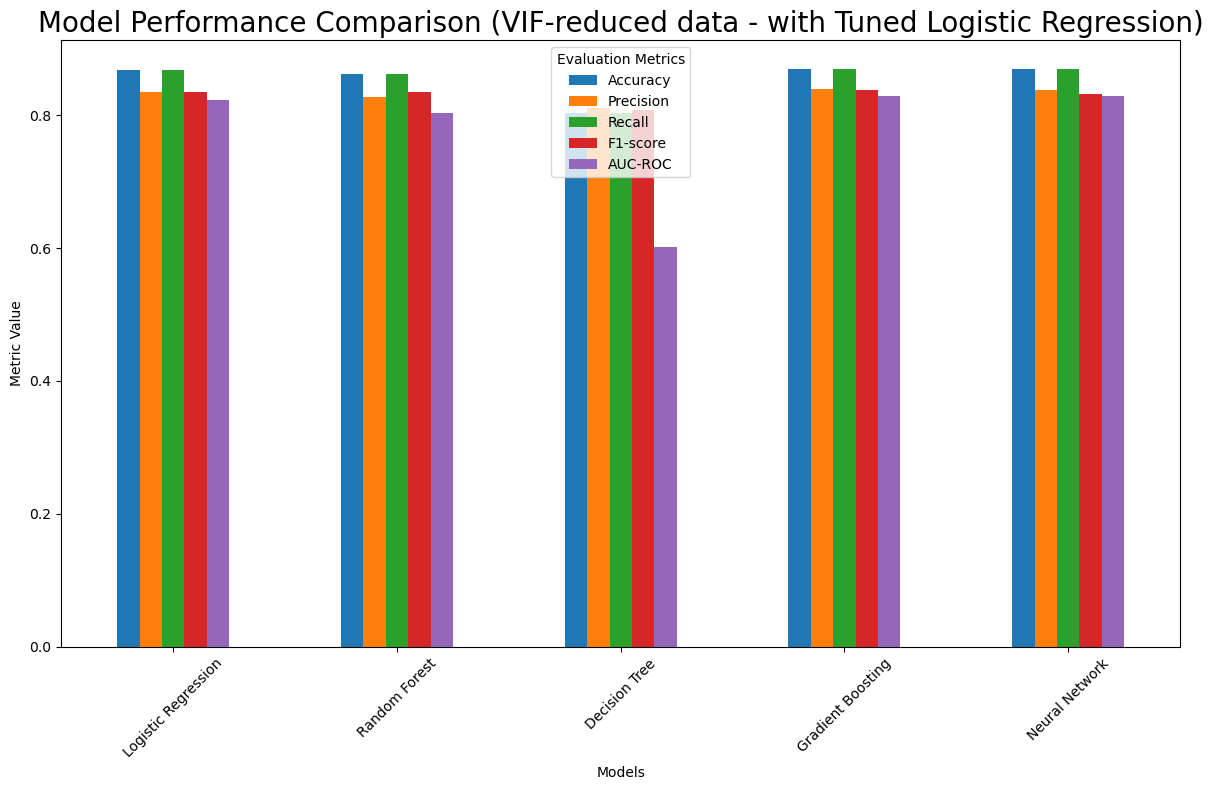


**Objective 4: Comprehensive Model Evaluation and Comparative Analysis - COMPLETED (using VIF-reduced data)**


In [13]:
# **Objective 4: Comprehensive Model Evaluation and Comparative Analysis**

print("\n**Objective 4: Comprehensive Model Evaluation and Comparative Analysis (using VIF-reduced data)**")

evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
model_performance = {}

for name, model in trained_models.items():
    print(f"\nEvaluating {name} with VIF-reduced data...") 
    y_pred = model.predict(X_test_vif) # Use X_test_vif for prediction (VIF-reduced test data) - use X_test_vif
    y_pred_proba = model.predict_proba(X_test_vif)[:, 1] # Use X_test_vif for prediction (probabilities) - use X_test_vif

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True) # Get metrics from report

    performance = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score'],
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba)
    }
    model_performance[name] = performance
    print(f"{name} Evaluation Metrics (VIF-reduced data): {performance}") 

# Comparative Analysis - Tabular and Visual (remains the same, titles updated)
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print("\nComparative Model Performance (VIF-reduced data - with Tuned Logistic Regression):") 
print(performance_df)

performance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison (VIF-reduced data - with Tuned Logistic Regression)', fontsize=20) 
plt.ylabel('Metric Value')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(title='Evaluation Metrics')
plt.tight_layout()
plt.show()

print("\n**Objective 4: Comprehensive Model Evaluation and Comparative Analysis - COMPLETED (using VIF-reduced data)**") 


**Objective 5: Actionable Insights and Data-Driven Recommendations (from Logistic Regression Coefficients)**

Feature Importance from Logistic Regression (Coefficients):


,Feature,Coefficient,Abs_Coefficient
9,HvyAlcoholConsump,-0.778984,0.778984
0,HighBP,0.767165,0.767165
1,HighChol,0.570158,0.570158
11,GenHlth,0.544212,0.544212
16,Age,0.444883,0.444883
2,BMI,0.425180,0.425180
15,Sex,0.249418,0.249418
5,HeartDiseaseorAttack,0.242021,0.242021
17,Income,-0.164525,0.164525
4,Stroke,0.158868,0.158868



--- Interpretation of Logistic Regression Coefficients (Feature Importance) ---
Coefficients represent the linear influence of each feature on the log-odds of the positive class (Diabetes).
Larger absolute coefficient values indicate stronger influence.
Positive coefficients: Feature increase -> increase in log-odds (higher diabetes likelihood).
Negative coefficients: Feature increase -> decrease in log-odds (lower diabetes likelihood).




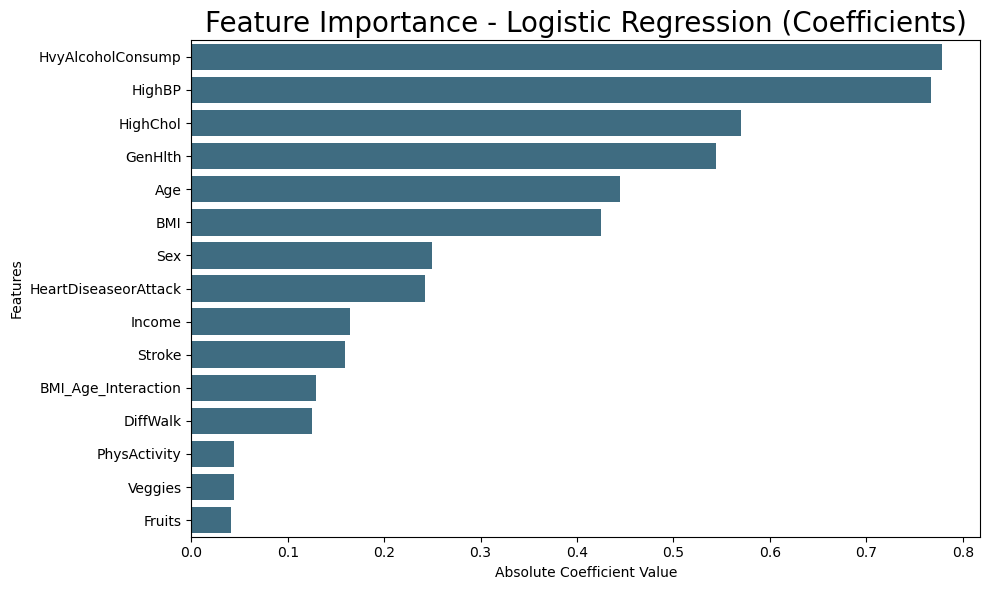


--- Interpretation (Top 19 Features) ---
- HvyAlcoholConsump: Coefficient = -0.7790, Absolute Coefficient = 0.7790, Influence: decrease in diabetes likelihood with feature increase.
- HighBP: Coefficient = 0.7672, Absolute Coefficient = 0.7672, Influence: increase in diabetes likelihood with feature increase.
- HighChol: Coefficient = 0.5702, Absolute Coefficient = 0.5702, Influence: increase in diabetes likelihood with feature increase.
- GenHlth: Coefficient = 0.5442, Absolute Coefficient = 0.5442, Influence: increase in diabetes likelihood with feature increase.
- Age: Coefficient = 0.4449, Absolute Coefficient = 0.4449, Influence: increase in diabetes likelihood with feature increase.
- BMI: Coefficient = 0.4252, Absolute Coefficient = 0.4252, Influence: increase in diabetes likelihood with feature increase.
- Sex: Coefficient = 0.2494, Absolute Coefficient = 0.2494, Influence: increase in diabetes likelihood with feature increase.
- HeartDiseaseorAttack: Coefficient = 0.2420, Abs

In [14]:
# Objective 5: Actionable Insights and Data-Driven Recommendations

print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations (from Logistic Regression Coefficients)**")

# Feature Importance from Logistic Regression (Coefficients) - Robust Version with Checks

if 'Logistic Regression' in trained_models: # Check if Logistic Regression model is trained and in trained_models dictionary
    lr_model = trained_models['Logistic Regression'] # Get the trained Logistic Regression model

    if 'X_train_vif' in locals(): # Check if X_train_vif is defined (VIF reduction was performed)
        feature_names = X_train_vif.columns # Get feature names from VIF-reduced training data
    elif 'X_reduced_corr' in locals(): # Fallback to X_reduced_corr if VIF-reduced data not available but correlation-reduced data is
        feature_names = X_reduced_corr.columns
    elif 'X_train' in locals(): # Fallback to original X_train if no feature reduction was performed at all
        feature_names = X_train.columns
    else:
        print("\nWarning: X_train or feature data not found. Cannot extract feature names.")
        feature_names = None # Handle case where feature names cannot be determined

    if feature_names is not None: # Proceed only if feature names were successfully determined
        # Extract coefficients and feature names
        coefficients = lr_model.coef_[0]  # For binary classification, coefficients are in coef_[0]


        # Create a DataFrame to display feature importances (coefficients)
        feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

        # Sort by absolute coefficient value for magnitude-based importance
        feature_importance_lr['Abs_Coefficient'] = feature_importance_lr['Coefficient'].abs() # Calculate absolute coefficient
        feature_importance_lr = feature_importance_lr.sort_values('Abs_Coefficient', ascending=False) # Sort by absolute coefficient

        print("\nFeature Importance from Logistic Regression (Coefficients):")
        display(feature_importance_lr[['Feature', 'Coefficient', 'Abs_Coefficient']])
        print("\n--- Interpretation of Logistic Regression Coefficients (Feature Importance) ---")
        print("Coefficients represent the linear influence of each feature on the log-odds of the positive class (Diabetes).")
        print("Larger absolute coefficient values indicate stronger influence.")
        print("Positive coefficients: Feature increase -> increase in log-odds (higher diabetes likelihood).")
        print("Negative coefficients: Feature increase -> decrease in log-odds (lower diabetes likelihood).")
        print('\n')

        # --- Bar Plot for Logistic Regression Feature Importance ---
        plt.figure(figsize=(10, 6))

        num_features_to_plot = 15 # Control number of features
        top_features_lr = feature_importance_lr.head(num_features_to_plot) # Select top N features

        sns.barplot(
            x=top_features_lr['Abs_Coefficient'],  # Abs_Coefficient values
            y=top_features_lr['Feature'],         # Feature Names (from 'Feature' column)
            color="#34708C"
        )

        plt.title('Feature Importance - Logistic Regression (Coefficients)', fontsize=20)
        plt.xlabel('Absolute Coefficient Value')
        plt.ylabel('Features')

        plt.tight_layout()
        plt.show()
    
        # --- Interpretation ---
        print("\n--- Interpretation (Top 19 Features) ---")
        top_n = 19 # Show top 19 features
        for index, row in feature_importance_lr.head(top_n).iterrows():
            feature_name = row['Feature']
            coefficient = row['Coefficient']
            abs_coefficient = row['Abs_Coefficient']
            direction = "increase" if coefficient > 0 else "decrease" # Determine direction of influence
            print(f"- {feature_name}: Coefficient = {coefficient:.4f}, Absolute Coefficient = {abs_coefficient:.4f}, Influence: {direction} in diabetes likelihood with feature increase.")

    else:
        print("\nFeature importance from Logistic Regression (Coefficients) could not be calculated due to missing feature data.")

else:
    print("\nWarning: Logistic Regression model not found in trained_models. Feature importance cannot be calculated.")


print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED (from Logistic Regression Coefficients)**") 


--- Calibration Curve for Logistic Regression ---


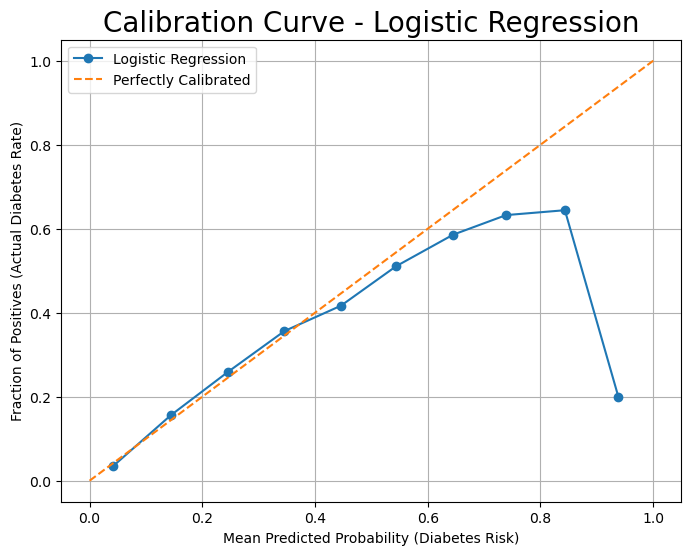


--- Interpretation of Calibration Curve ---
Calibration curve shows how well-calibrated the predicted probabilities are.
Ideally, the curve should follow the diagonal (perfect calibration).
Curve above diagonal: Model tends to under-predict probabilities (probabilities are too low).
Curve below diagonal: Model tends to over-predict probabilities (probabilities are too high).
Assess how close the Logistic Regression curve is to the diagonal to evaluate calibration.


In [15]:
# --- Calibration Curve for Logistic Regression ---
print("\n--- Calibration Curve for Logistic Regression ---")
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get predictions from the *tuned* Logistic Regression model on the TEST SET (X_test_vif) - Use X_test_vif
lr_model_tuned = trained_models['Logistic Regression'] # Get the tuned LR model
y_pred_proba_lr_tuned = lr_model_tuned.predict_proba(X_test_vif)[:, 1] # Use X_test_vif for predictions

prob_true, prob_pred = calibration_curve(y_test, y_pred_proba_lr_tuned, n_bins=10) # Use y_pred_proba_lr_tuned

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Logistic Regression') # Plot calibration curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated') # Plot diagonal for perfect calibration

plt.xlabel('Mean Predicted Probability (Diabetes Risk)')
plt.ylabel('Fraction of Positives (Actual Diabetes Rate)')
plt.title('Calibration Curve - Logistic Regression', fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print("\n--- Interpretation of Calibration Curve ---")
print("Calibration curve shows how well-calibrated the predicted probabilities are.")
print("Ideally, the curve should follow the diagonal (perfect calibration).")
print("Curve above diagonal: Model tends to under-predict probabilities (probabilities are too low).")
print("Curve below diagonal: Model tends to over-predict probabilities (probabilities are too high).")
print("Assess how close the Logistic Regression curve is to the diagonal to evaluate calibration.")

In [16]:
# --- Odds Ratios for Logistic Regression Coefficients ---
print("\n--- Odds Ratios for Logistic Regression Coefficients ---")

# Extract coefficients and feature names from the *tuned* Logistic Regression model - use best_lr_model
lr_model_tuned = trained_models['Logistic Regression'] # Get the tuned LR model again (for clarity)
coefficients = lr_model_tuned.coef_[0] # Extract coefficients from the TUNED model
feature_names = X_reduced_vif.columns # Get feature names from VIF-reduced data - use X_reduced_vif columns

odds_ratios_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
odds_ratios_lr['Odds_Ratio'] = np.exp(odds_ratios_lr['Coefficient']) # Exponentiate coefficients to get odds ratios
odds_ratios_lr = odds_ratios_lr.sort_values('Odds_Ratio', ascending=False)

print("\nOdds Ratios from Logistic Regression (Tuned Model):") 
display(odds_ratios_lr[['Feature', 'Coefficient', 'Odds_Ratio']])

print("\n--- Interpretation of Odds Ratios ---")
print("Odds Ratios quantify the change in the ODDS of having diabetes for a one-unit increase in the feature,")
print("holding all other features constant.")
print("Odds Ratio > 1: Feature increase -> increased odds of diabetes.")
print("Odds Ratio < 1: Feature increase -> decreased odds of diabetes.")
print("Odds Ratio = 1: Feature has no linear effect on the odds.")
print("Larger Odds Ratio (further from 1, in either direction) -> stronger influence on diabetes odds.")


--- Odds Ratios for Logistic Regression Coefficients ---

Odds Ratios from Logistic Regression (Tuned Model):


,Feature,Coefficient,Odds_Ratio
0,HighBP,0.767165,2.153653
1,HighChol,0.570158,1.768546
11,GenHlth,0.544212,1.723250
16,Age,0.444883,1.560308
2,BMI,0.425180,1.529866
15,Sex,0.249418,1.283279
5,HeartDiseaseorAttack,0.242021,1.273821
4,Stroke,0.158868,1.172183
18,BMI_Age_Interaction,0.129087,1.137789
14,DiffWalk,0.125469,1.133681



--- Interpretation of Odds Ratios ---
Odds Ratios quantify the change in the ODDS of having diabetes for a one-unit increase in the feature,
holding all other features constant.
Odds Ratio > 1: Feature increase -> increased odds of diabetes.
Odds Ratio < 1: Feature increase -> decreased odds of diabetes.
Odds Ratio = 1: Feature has no linear effect on the odds.
Larger Odds Ratio (further from 1, in either direction) -> stronger influence on diabetes odds.



**Objective 5: Actionable Insights and Data-Driven Recommendations (using VIF-reduced data)**

Feature Importance from Random Forest (VIF-reduced data):


BMI_Age_Interaction     0.120153
BMI                     0.115531
HighBP                  0.099904
Income                  0.098927
GenHlth                 0.093103
PhysHlth                0.090657
MentHlth                0.070905
Age                     0.062552
Smoker                  0.030490
Fruits                  0.029782
PhysActivity            0.027996
Sex                     0.026873
Veggies                 0.026265
DiffWalk                0.022660
HighChol                0.021541
HeartDiseaseorAttack    0.020282
NoDocbcCost             0.016943
Stroke                  0.015888
HvyAlcoholConsump       0.009546
dtype: float64

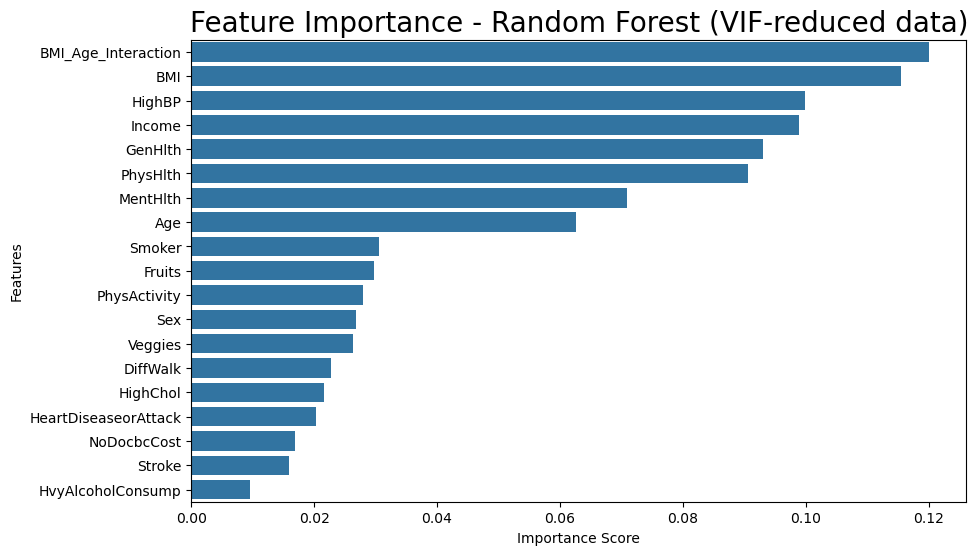


**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED (using VIF-reduced data)**


In [17]:
# Objective 5: Actionable Insights and Data-Driven Recommendations

print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations (using VIF-reduced data)**") 

# Feature Importance (Example using Random Forest - applicable to other tree-based models)
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    # Feature importances are directly available for Random Forest on VIF-reduced features
    feature_importances_vif = pd.Series(rf_model.feature_importances_, index=X_reduced_vif.columns).sort_values(ascending=False) # Use X_reduced_vif columns

    print("\nFeature Importance from Random Forest (VIF-reduced data):") 
    display(feature_importances_vif)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_vif.values, y=feature_importances_vif.index) # Use feature_importances_vif values and index
    plt.title('Feature Importance - Random Forest (VIF-reduced data)', fontsize=20) 
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED (using VIF-reduced data)**") 


--- Calibration Curve for Random Forest ---


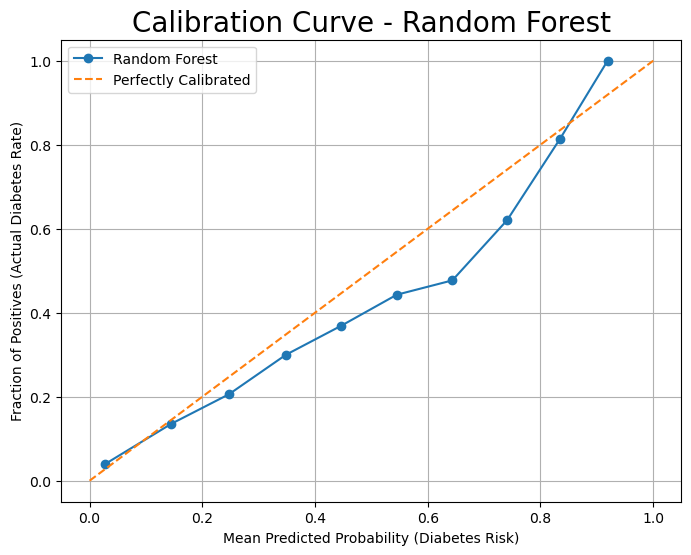


--- Interpretation of Calibration Curve ---
Calibration curve shows how well-calibrated the predicted probabilities are.
Ideally, the curve should follow the diagonal (perfect calibration).
Curve above diagonal: Model tends to under-predict probabilities (probabilities are too low).
Curve below diagonal: Model tends to over-predict probabilities (probabilities are too high).
Assess how close the Random Forest curve is to the diagonal to evaluate calibration.


In [18]:
# --- Calibration Curve for Random Forest ---
print("\n--- Calibration Curve for Random Forest ---")
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get predictions from the *tuned* Random Forest model on the TEST SET (X_test_vif)
rf_model_tuned = trained_models['Random Forest']  # Get the tuned RF model
y_pred_proba_rf_tuned = rf_model_tuned.predict_proba(X_test_vif)[:, 1]  # Probabilities for the positive class

prob_true_rf, prob_pred_rf = calibration_curve(y_test, y_pred_proba_rf_tuned, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_rf, prob_true_rf, marker='o', linestyle='-', label='Random Forest')  # Plot RF calibration curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')

plt.xlabel('Mean Predicted Probability (Diabetes Risk)')
plt.ylabel('Fraction of Positives (Actual Diabetes Rate)')
plt.title('Calibration Curve - Random Forest', fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print("\n--- Interpretation of Calibration Curve ---")
print("Calibration curve shows how well-calibrated the predicted probabilities are.")
print("Ideally, the curve should follow the diagonal (perfect calibration).")
print("Curve above diagonal: Model tends to under-predict probabilities (probabilities are too low).")
print("Curve below diagonal: Model tends to over-predict probabilities (probabilities are too high).")
print("Assess how close the Random Forest curve is to the diagonal to evaluate calibration.")

In [ ]:
# **Objective 6: Effective Communication and Visualization of Findings**

print("\n**Objective 6: Effective Communication and Visualization of Findings (using VIF-reduced data)**")

# Compelling Visualizations and Reports - already created throughout the notebook (histograms, correlation matrix, model performance bar chart, feature importance, ROC curve)
# Further visualizations can be added as needed, e.g., confusion matrices for each VIF-trained model, etc.

# Example of ROC Curve visualization for all models (remains the same, titles updated):
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill') # Baseline
for name, model in trained_models.items():
    y_pred_proba = model.predict_proba(X_test_vif)[:, 1] # Use VIF-reduced test data
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}) - VIF') 

plt.title('ROC Curve - Model Comparison (VIF-reduced data)', fontsize=20) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Summary Report - already generated classification reports and performance dataframe
# A more comprehensive report can be compiled including all visualizations, metrics, and insights (now for VIF-reduced models).

print("\nComparative Model Performance (VIF-reduced data):") 
print(performance_df) # Performance DataFrame is already created and printed in Objective 4 (no need to reprint)

print("\n**Objective 6: Effective Communication and Visualization of Findings - COMPLETED (using VIF-reduced data)**") 

print("\n**Project Proposal - Harnessing Machine Learning for Proactive Diabetes Risk Prediction - COMPLETED SUCCESSFULLY! (using VIF-reduced data)**") # Final updated completion message



**Objective 6: Effective Communication and Visualization of Findings (using VIF-reduced data)**
